In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu
import networkx as nx
import copy
import itertools
from utils_graphs import create_graph, plot_graph, get_colors, fig_graph_degrees
import utils_PLS as upls
import matplotlib.colors as cm
from matplotlib.lines import Line2D

In [2]:
# load query file where we added volumes for each area
volumes = ace.clean_volumes_database()

In [3]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'BL_wf_USV_Bedding_wb'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_BL_wf_USV_Bedding_wb.npy', allow_pickle=True).item()
batch='BL_wf_USV_Bedding_wb'

subjects = list(dict_results_across_mice.keys())

experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects,
                                                group_labels=['Control',
                                                       'USVC57',
                                                       'USVBALB',
                                                       'USVBALB_Bedding',
                                                       'USVC57_Bedding',
                                                       'Bedding'])

In [4]:
allen_order = list(volumes[volumes['st_level']==8]['acronym'])

In [5]:
df_levels = upls.create_df_levels(volumes)

In [8]:
sig_ncells = ace.kruskal_per_area(dictionary=dict_results_across_mice,
                 value='n_cells', experimental_groups=experimental_groups)

In [14]:
sig_area_ncells = list(sig_ncells.keys())

In [15]:
df_Control_cell_count, df_USVC57_cell_count, df_USVBALB_cell_count,\
df_USVBALB_Bedding_cell_count, df_USVC57_Bedding_cell_count, df_Bedding_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')
groups_df = [df_Control_cell_count, df_USVC57_cell_count, df_USVBALB_cell_count,\
df_USVBALB_Bedding_cell_count, df_USVC57_Bedding_cell_count, df_Bedding_cell_count]

In [16]:
corr_matrix_control = ace.cross_corr(df_Control_cell_count)
corr_matrix_USVC57 = ace.cross_corr(df_USVC57_cell_count)
corr_matrix_USVBALB = ace.cross_corr(df_USVBALB_cell_count)
corr_matrix_USVC57_Bedding = ace.cross_corr(df_USVC57_Bedding_cell_count)
corr_matrix_USVBALB_Bedding = ace.cross_corr(df_USVBALB_Bedding_cell_count)
corr_matrix_Bedding = ace.cross_corr(df_Bedding_cell_count)

In [20]:
corr_threshold = 0.75
G_control = create_graph(corr_matrix_control, volumes=volumes, 
                         significant_areas=sig_area_ncells, 
                         corr_threshold=corr_threshold, correlations='one')

G_USVC57 = create_graph(corr_matrix_USVC57,  volumes=volumes, 
                         significant_areas=sig_area_ncells, 
                         corr_threshold=corr_threshold, correlations='one')

G_USVBALB = create_graph(corr_matrix_USVBALB,  volumes=volumes, 
                         significant_areas=sig_area_ncells, 
                         corr_threshold=corr_threshold, correlations='one')

G_USVC57_Bedding = create_graph(corr_matrix_USVC57_Bedding,  volumes=volumes, 
                         significant_areas=sig_area_ncells, 
                         corr_threshold=corr_threshold, correlations='one')

G_USVBALB_Bedding = create_graph(corr_matrix_USVBALB_Bedding,  volumes=volumes, 
                         significant_areas=sig_area_ncells, 
                         corr_threshold=corr_threshold, correlations='one')

G_Bedding = create_graph(corr_matrix_Bedding, volumes=volumes, 
                         significant_areas=sig_area_ncells, 
                         corr_threshold=corr_threshold, correlations='one')

# Graphs of positive correlations

(<Figure size 864x360 with 1 Axes>, <AxesSubplot:title={'center':'Control'}>)

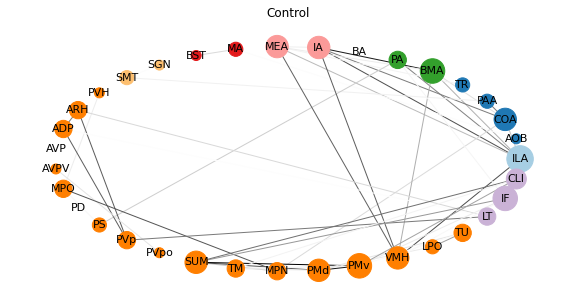

In [23]:
fig_graph_degrees(G=G_control, title='Control', volumes=volumes, figsize=(12,5), 
                  show_degrees=False, show_colorbar=False, show_legend=False, fontsize=11)

(<Figure size 864x360 with 1 Axes>, <AxesSubplot:title={'center':'USVC57'}>)

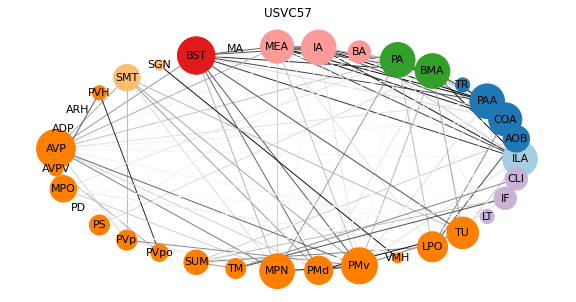

In [24]:
fig_graph_degrees(G=G_USVC57, title='USVC57', volumes=volumes, figsize=(12,5), 
                  show_degrees=False, show_colorbar=False, show_legend=False, fontsize=11)

(<Figure size 864x360 with 1 Axes>, <AxesSubplot:title={'center':'USVBALB'}>)

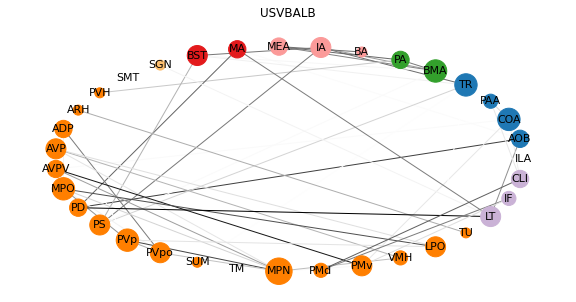

In [25]:
fig_graph_degrees(G=G_USVBALB, title='USVBALB', volumes=volumes, figsize=(12,5), 
                  show_degrees=False, show_colorbar=False, show_legend=False, fontsize=11)

(<Figure size 864x360 with 1 Axes>,
 <AxesSubplot:title={'center':'USVC57_Bedding'}>)

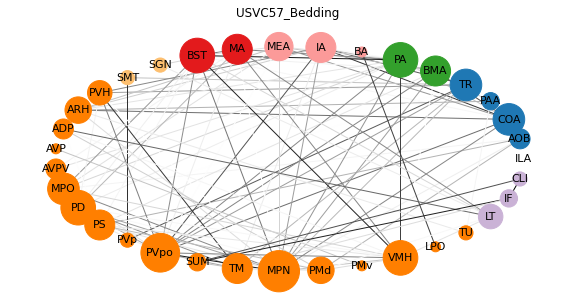

In [26]:
fig_graph_degrees(G=G_USVC57_Bedding, title='USVC57_Bedding', volumes=volumes, figsize=(12,5), 
                  show_degrees=False, show_colorbar=False, show_legend=False, fontsize=11)

(<Figure size 864x360 with 1 Axes>,
 <AxesSubplot:title={'center':'USVBALB_Bedding'}>)

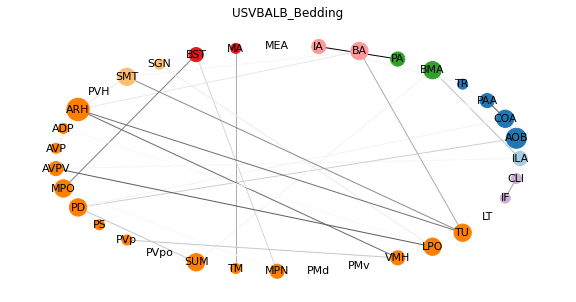

In [27]:
fig_graph_degrees(G=G_USVBALB_Bedding, title='USVBALB_Bedding', volumes=volumes, figsize=(12,5), 
                  show_degrees=False, show_colorbar=False, show_legend=False, fontsize=11)

(<Figure size 864x360 with 1 Axes>, <AxesSubplot:title={'center':'Bedding'}>)

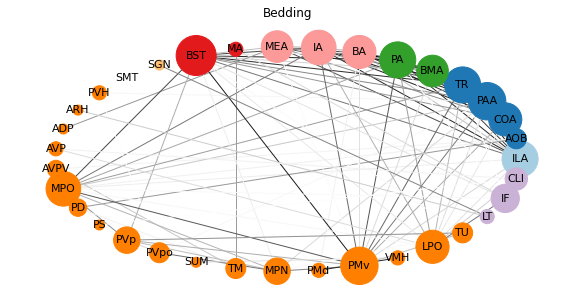

In [28]:
fig_graph_degrees(G=G_Bedding, title='Bedding', volumes=volumes, figsize=(12,5), 
                  show_degrees=False, show_colorbar=False, show_legend=False, fontsize=11)

# Degrees

(<Figure size 864x216 with 1 Axes>,
 <AxesSubplot:xlabel='Area', ylabel='Degree'>)

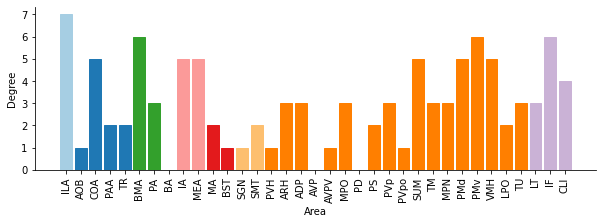

In [31]:
fig_graph_degrees(G=G_control, title='Control', volumes=volumes, figsize=(12,3), 
                  show_degrees=True, show_colorbar=False, show_legend=False, show_graph=False, fontsize=11)

(<Figure size 864x216 with 1 Axes>,
 <AxesSubplot:xlabel='Area', ylabel='Degree'>)

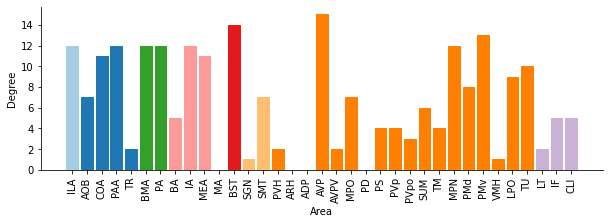

In [32]:
fig_graph_degrees(G=G_USVC57, title='USVC57', volumes=volumes, figsize=(12,3), 
                  show_degrees=True, show_colorbar=False, show_legend=False, show_graph=False, fontsize=11)

(<Figure size 864x216 with 1 Axes>,
 <AxesSubplot:xlabel='Area', ylabel='Degree'>)

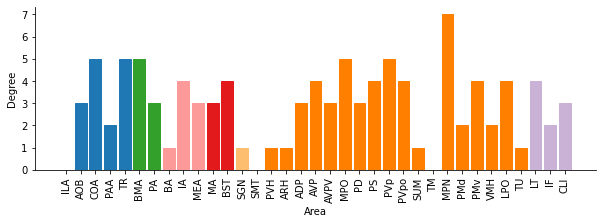

In [33]:
fig_graph_degrees(G=G_USVBALB, title='USVBALB', volumes=volumes, figsize=(12,3), 
                  show_degrees=True, show_colorbar=False, show_legend=False, show_graph=False, fontsize=11)

(<Figure size 864x216 with 1 Axes>,
 <AxesSubplot:xlabel='Area', ylabel='Degree'>)

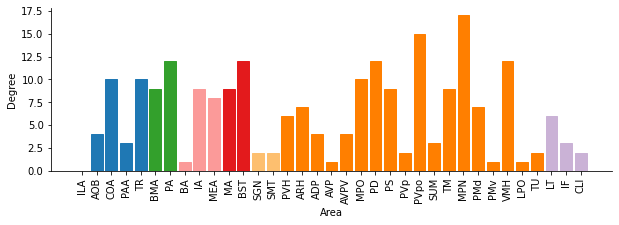

In [34]:
fig_graph_degrees(G=G_USVC57_Bedding, title='USVC57_Bedding', volumes=volumes, figsize=(12,3), 
                  show_degrees=True, show_colorbar=False, show_legend=False, show_graph=False, fontsize=11)

(<Figure size 864x216 with 1 Axes>,
 <AxesSubplot:xlabel='Area', ylabel='Degree'>)

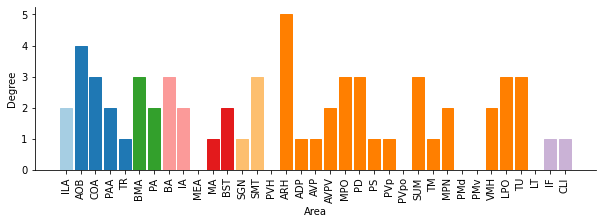

In [35]:
fig_graph_degrees(G=G_USVBALB_Bedding, title='USVBALB_Bedding', volumes=volumes, figsize=(12,3), 
                  show_degrees=True, show_colorbar=False, show_legend=False, show_graph=False, fontsize=11)

(<Figure size 864x216 with 1 Axes>,
 <AxesSubplot:xlabel='Area', ylabel='Degree'>)

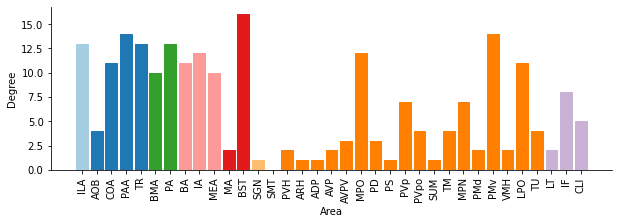

In [36]:
fig_graph_degrees(G=G_Bedding, title='Bedding', volumes=volumes, figsize=(12,3), 
                  show_degrees=True, show_colorbar=False, show_legend=False, show_graph=False, fontsize=11)

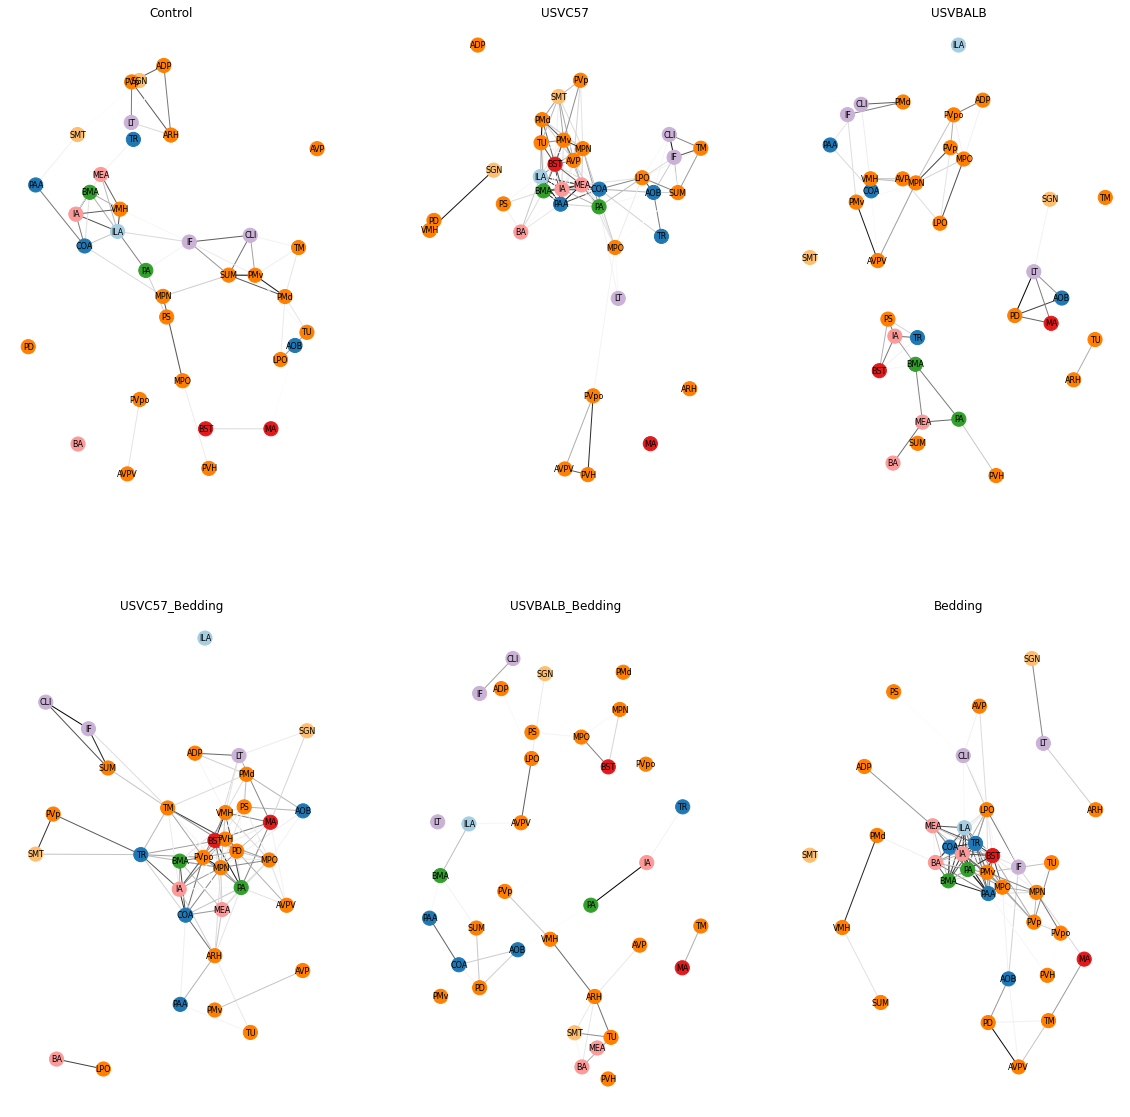

In [39]:
show_colorbar=True
show_legend=True
Gs = [G_control, G_USVC57, G_USVBALB,
     G_USVC57_Bedding, G_USVBALB_Bedding, G_Bedding]
titles=['Control', 'USVC57', 'USVBALB', 'USVC57_Bedding', 'USVBALB_Bedding', 'Bedding']
# create tables
allen_order = list(volumes[volumes['st_level']==8]['acronym'])
df_levels = upls.create_df_levels(volumes)

# create figure
fig = plt.figure(figsize=(20, 20))

edge_cmap = plt.cm.get_cmap('Greys')

# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(2, 3)

# plot graph
for i, G in enumerate(Gs):
    ax = fig.add_subplot(axgrid[i])

    order=allen_order

    # Plot the network:
    # pos = nx.spring_layout(sorted(list(G.nodes()),
    #   key = order.index))
    pos = nx.spring_layout(G, k=0.5, seed=42)
    list_colors = get_colors(G, df_levels, order, volumes=volumes,
                 macroareas_to_exclude=['Pons', 'Medulla', 'Cerebellar cortex', 'Cerebellar nuclei'])[0]
    nx.draw(G, with_labels=True, node_color=list_colors, 
            node_size=200,font_size=8, pos=pos, ax=ax, edge_cmap=edge_cmap, width=1,
            edge_color=[G[u][v]['weight'] for u, v in G.edges])

    # relabel graphs
    ax.set_title(titles[i])


## Histogram degrees

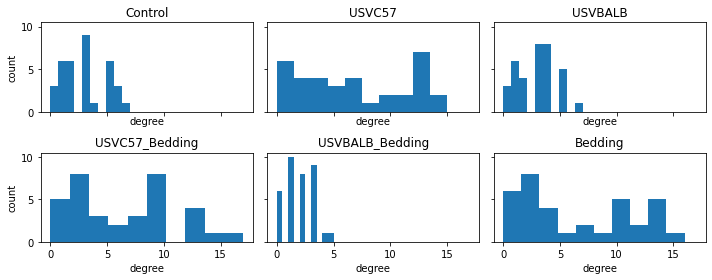

In [42]:
fig, axes = plt.subplots(2,3, figsize=(10,4), sharex=True, sharey=True)
axes = axes.flatten()
axes[0].set_title('Control')
axes[0].hist(list(dict(G_control.degree).values()))
axes[1].set_title('USVC57')
axes[1].hist(list(dict(G_USVC57.degree).values()))
axes[2].set_title('USVBALB')
axes[2].hist(list(dict(G_USVBALB.degree).values()))
axes[3].set_title('USVC57_Bedding')
axes[3].hist(list(dict(G_USVC57_Bedding.degree).values()))
axes[4].set_title('USVBALB_Bedding')
axes[4].hist(list(dict(G_USVBALB_Bedding.degree).values()))
axes[5].set_title('Bedding')
axes[5].hist(list(dict(G_Bedding.degree).values()))
for i in range(6):
    axes[i].set_xlabel('degree')
axes[0].set_ylabel('count')
axes[3].set_ylabel('count')
plt.tight_layout()
# plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/hist_degree.svg')
# plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/hist_degree.png')

## Overall correlations

Text(0.5, 0.98, 'Correlations of all areas')

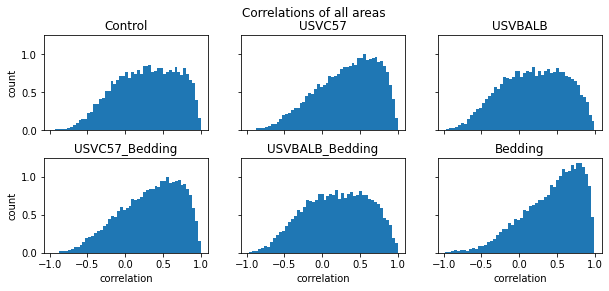

In [51]:
fig, axes = plt.subplots(2,3, figsize=(10,4), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.3)
axes = axes.flatten()
for i, corr in enumerate([corr_matrix_control, 
                          corr_matrix_USVC57, 
                          corr_matrix_USVBALB,
                          corr_matrix_USVC57, 
                          corr_matrix_USVBALB,
                          corr_matrix_Bedding]):
    axes[i].hist(corr.mask(np.triu(np.ones(corr.shape)).astype(bool)).stack().values, bins=50, density=True)
axes[0].set_title('Control')
axes[1].set_title('USVC57')
axes[2].set_title('USVBALB')
axes[3].set_title('USVC57_Bedding')
axes[4].set_title('USVBALB_Bedding')
axes[5].set_title('Bedding')
for i in range(3,6):
    axes[i].set_xlabel('correlation')
axes[0].set_ylabel('count')
axes[3].set_ylabel('count')
plt.suptitle('Correlations of all areas')